# Plot and analyze anisotropy data (AMS)

The anisotropy of magnetic susceptibility and remanence can give significant insight to geological processes. Phenomena such as sedimentary deposition, magma flow, and deformation can all lead to preferred orientations of magnetic minerals. Such "magnetic fabrics'' give rise to anisotropy. Additionally, paleomagnetic vectors can be influenced by magnetic fabrics in their direction and intensity which further motivates efforts to quantify anisotropy.

This notebook is focused on one of the most common types of anisotropy data which is anisotropy of magnetic susceptibility (AMS). The anisotropy of anhysteretic remanence (AARM) will be dealt with in a separate notebook.

## Introduction to anisotropy of magnetic susceptibility (AMS)

Magnetic susceptibility describes the relationship between an applied magnetic field and the magnetization that is induced by this field.

$M = \chi H$

where $M$ is the magnetization (in A/m), $H$ is the applied field (in A/m), and $\chi$ is the magnetic susceptibility (this is the mass susceptibility in m<sup>3</sup>/kg). If a material is perfectly isotropic, the relationship described by $\chi$ is independent of the orientation of the sample relative to the applied field. However, if there is a different response in different orientations the material can be considered to be anisotropic. 

In practice, AMS is quantified by varying the orientation of a sample within the coils of a magnetic susceptibility bridge. By doing so, the length and orientation of the principal, major, and minor eigenvectors can be determined where:

$V_1 \geq V_2 \geq V_3$

these eigenvectors are also referred to in the literature as:

$K_{max} \geq K_{int} \geq K_{min}$

and the anisotropy ellipsoid can be illustrated as:

<figure>
  <img src="https://raw.githubusercontent.com/PmagPy/RockmagPy-notebooks/main/book/images/AMS.png" alt="Description of the image" width="450">
  <figcaption>from https://www.agico.cz/downloads/documents/agicoprints/ams_rocks_pres.pdf </figcaption>
</figure>

## Import scientific python libraries

Run the cell below to import the functions needed for the notebook.

In [1]:
import pandas as pd
import pmagpy.ipmag as ipmag
import pmagpy.contribution_builder as cb

import matplotlib.pyplot as plt
%matplotlib inline

## Import data

We will download data from a MagIC contribution associated with the study: 

> Schwehr and Tauxe (2003). Characterization of soft-sediment deformation: Detection of cryptoslumps using magnetic methods. Geology 31 (3):203. doi:10.1130/0091-7613(2003)031<0203:COSSDD>2.0.CO;2.

The MagIC formated data for that study can be found here: https://earthref.org/MagIC/19571. We can use the MagIC id of 19571 to download the data from MagIC using the `ipmag.download_magic_from_id()` function.

We will set the directory, download the file from MagIC (using `ipmag.download_magic_from_id()`), unpack the MagIC file into its constituent tables (using `ipmag.unpack_magic`), and make those tables into a Contribution object (using `cb.Contribution()`).

In [2]:
dir_path = 'example_data/anisotropy_slump'
result, magic_file = ipmag.download_magic_from_id('19571', directory=dir_path)
ipmag.unpack_magic(magic_file, dir_path)
contribution = cb.Contribution(dir_path)

Download successful. File saved to: example_data/anisotropy_slump/magic_contribution_19571.txt
working on:  'contribution'
1  records written to file  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_data/anisotropy_slump/contribution.txt
contribution  data put in  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_data/anisotropy_slump/contribution.txt
working on:  'locations'
1  records written to file  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_data/anisotropy_slump/locations.txt
locations  data put in  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_data/anisotropy_slump/locations.txt
working on:  'sites'
6  records written to file  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_data/anisotropy_slump/sites.txt
sites  data put in  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_data/anisotropy_slump/sites.txt
working on:  'samples'
17  records written to file  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_data/anisotropy_sl

## Inspect data

Let's have a look at the anisotropy data which are provided at the specimen level in the specimens table. Of particular importance is the `aniso_s` column. This column is the anisotropy tensor diagonal elements as a six-element colon-delimited list.

In [5]:
specimens = contribution.tables['specimens'].df
specimens.dropna(axis=1, how='all').head() # see the first 5 measurements without empty columns

,age_high,age_low,age_unit,aniso_tilt_correction,aniso_type,aniso_v1,aniso_v2,aniso_v3,citations,description,...,geologic_types,lat,lithologies,location,lon,method_codes,samples,site,site_alternatives,specimens
site name,,,,,,,,,,,,,,,,,,,,,
as1,49,46,Ma,0,AMS,0.34364864:155:0.7:eta/zeta:64.9:7.8:37.7:249....,0.34138933:64.9:7.8:eta/zeta:155:0.7:37.7:249....,0.31496203:249.8:82.2:eta/zeta:155:0.7:37.7:64...,This study,as1:AMS,...,Sediment Layer,32.8694,Limey shale,Scripps Beach,242.7463,AE-H:LP-AN,as1b : as1c : as1d : as1e:as1a,as1,Cryptoslump:Site B,as1a2 : as1a3 : as1b1 : as1b2 : as1b3 : as1c1 ...
as1,49,46,Ma,0,AMS,0.34364864:155:0.7:eta/zeta:249.4:80.1:1.1:63....,0.34138933:64.9:7.8:eta/zeta:242.9:82.3:0.9:33...,0.31496203:249.8:82.2:eta/zeta:114.6:5.5:0.7:2...,This study,as1:AMS,...,Sediment Layer,32.8694,Limey shale,Scripps Beach,242.7463,AE-BS:AE-H:LP-AN,as1b : as1c : as1d : as1e:as1a,as1,Cryptoslump:Site B,as1a2 : as1a3 : as1b1 : as1b2 : as1b3 : as1c1 ...
as2,49,46,Ma,0,AMS,0.34858122:358.4:5.6:eta/zeta:88.7:3.6:29.6:21...,0.33781892:88.7:3.6:eta/zeta:358.4:5.6:29.6:21...,0.31359982:210.8:83.3:eta/zeta:358.4:5.6:29.6:...,This study,as2:AMS,...,Sediment Layer,32.8694,Limey shale,Scripps Beach,242.7463,AE-H:LP-AN,as2b : as2c : as2d : as2e : as2f:as2a,as2,Slumped:Site C,as2a2 : as2a3 : as2a4 : as2b1 : as2b2 : as2b3 ...
as2,49,46,Ma,0,AMS,0.34858122:358.4:5.6:eta/zeta:182.8:84.4:2.5:8...,0.33781892:88.7:3.6:eta/zeta:188.7:70.4:1.9:35...,0.31359982:210.8:83.3:eta/zeta:68.2:5.3:2.1:33...,This study,as2:AMS,...,Sediment Layer,32.8694,Limey shale,Scripps Beach,242.7463,AE-BS:AE-H:LP-AN,as2b : as2c : as2d : as2e : as2f:as2a,as2,Slumped:Site C,as2a2 : as2a3 : as2a4 : as2b1 : as2b2 : as2b3 ...
as3,49,46,Ma,0,AMS,0.34502691:358:5.8:eta/zeta:88.6:5.2:43.4:220....,0.337455:88.6:5.2:eta/zeta:358:5.8:43.4:220.5:...,0.31751812:220.5:82.2:eta/zeta:358:5.8:43.4:88...,This study,as3:AMS,...,Sediment Layer,32.8694,Limey shale,Scripps Beach,242.7463,AE-H:LP-AN,as3b : as3c : as3d : as3e : as3f:as3a,as3,Undeformed:Site A,as3a2 : as3a3 : as3b1 : as3b2 : as3b3 : as3c1 ...


The `aniso_s` list is a succinct representation of the anisotropy tensor $\chi$. In the linear equations below, $M_1$, $M_2$, and $M_3$ are the components of the magnetization vector $M$. The relationship between the magnetization and the magnetic field ($H_1$, $H_2$, and $H_3$) is described by the components of the magnetic susceptibility tensor $\chi_{ij}$. If the material is anisotropic, there will be different values in different orientations described by the $\chi$ tensor.

$$

\begin{align}

M_1 &= \chi_{11} H_1 + \chi_{12} H_2 + \chi_{13} H_3 \\

M_2 &= \chi_{21} H_1 + \chi_{22} H_2 + \chi_{23} H_3 \\

M_3 &= \chi_{31} H_1 + \chi_{32} H_2 + \chi_{33} H_3

\end{align}

$$

This susceptibility tensor has six independent matrix elements because $\chi_{ij} = \chi_{ji}$. The `aniso_s` column contains these six elements as $s_1$ : $s_2$ : $s_3$ : $s_4$ : $s_5$ : $s_6$ which are defined as:

$$

\begin{equation}

\begin{array}{l}

s_1 = \chi_{11} \\

s_2 = \chi_{22} \\

s_3 = \chi_{33} \\

s_4 = \chi_{12} = \chi_{21} \\

s_5 = \chi_{23} = \chi_{32} \\

s_6 = \chi_{13} = \chi_{31}

\end{array}

\end{equation}

$$

## Plot the data

The data can be plotted using the function `ipmag.aniso_magic_nb()`. 

An important aspect of AMS data analysis is estimating uncertainty associated with the mean eigenvectors. These means and their uncertainties are typically determined through two main approaches. These approaches estimate the confidence ellipses associated with data from a given site and are:
- parametric Hext confidence ellipses (Hext, 1963)
- non-parametric bootstrap confidence ellipses (Constable and Tauxe, 1990)

### Plot by contribution with Hext ellipses

Let's start by plotting the all of the AMS data from the study along with the Hext confidence ellipses. This is done by providing our `contribution` object to the function `ipmag.aniso_magic()` and setting the parameter `ihext=True`.

(True, [])

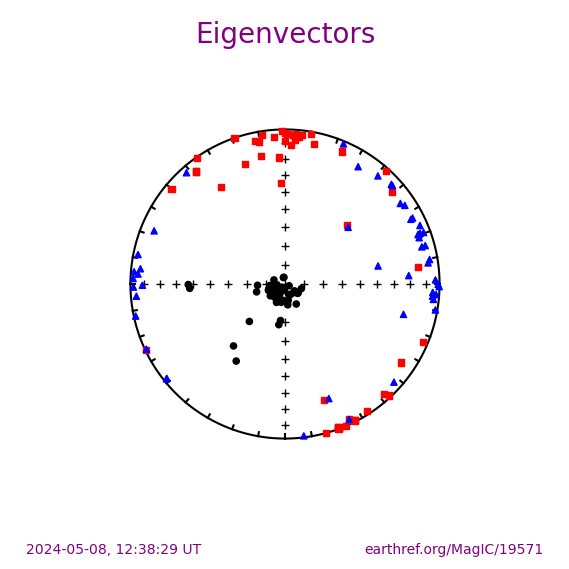

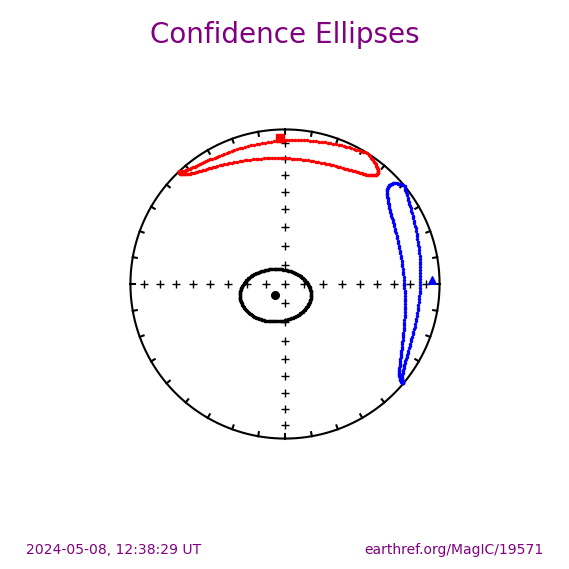

In [4]:
ipmag.aniso_magic_nb(contribution=contribution, 
                     ihext=True,
                     save_plots=False)

### Plot by site with Hext ellipses

The above plot is all of the data from the study. However, in the Schwehr and Tauxe (2003) study the data are from three distinct sites:
- as1; they refer to this site as a cryptoslump and call it site B in the paper
- as2; they refer to this site as a slump and call it site C in the paper
-  as3; they refer this cite as undeformed and call it site A in the paper.

It therefore makes sense to plot the data by site since they have distinct behavoirs. We can plot the data by site by setting `isite=True`.

(True, [])

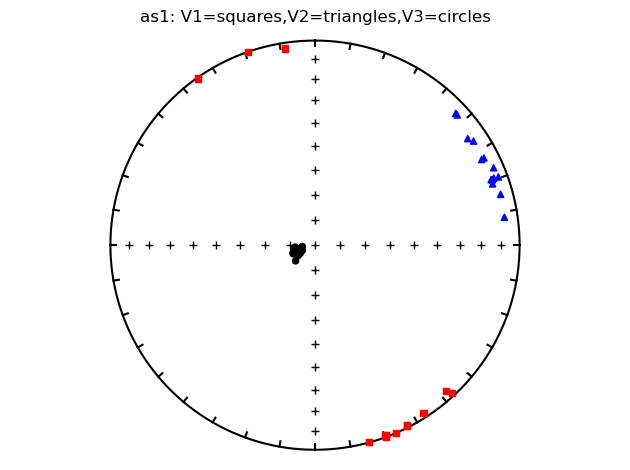

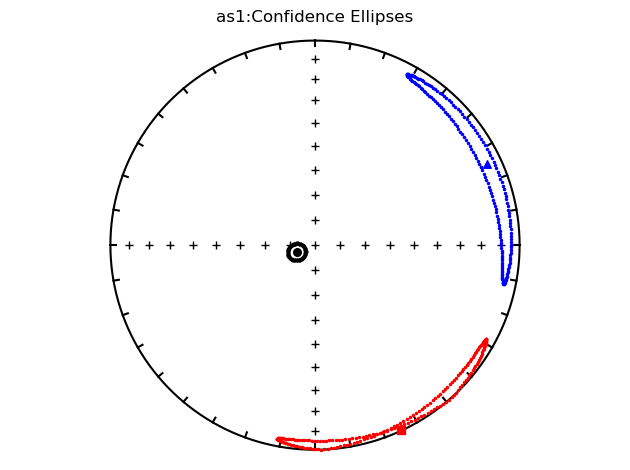

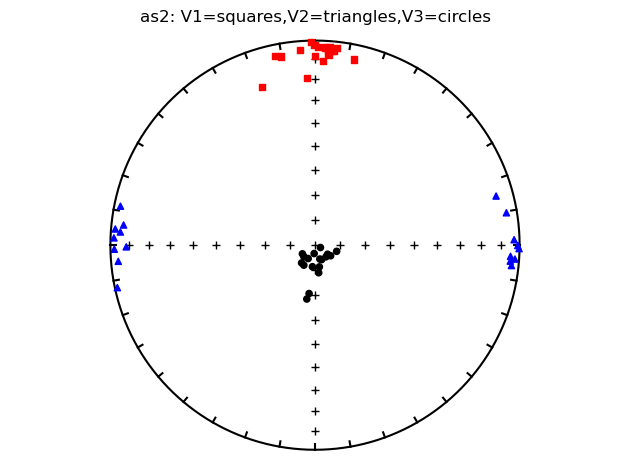

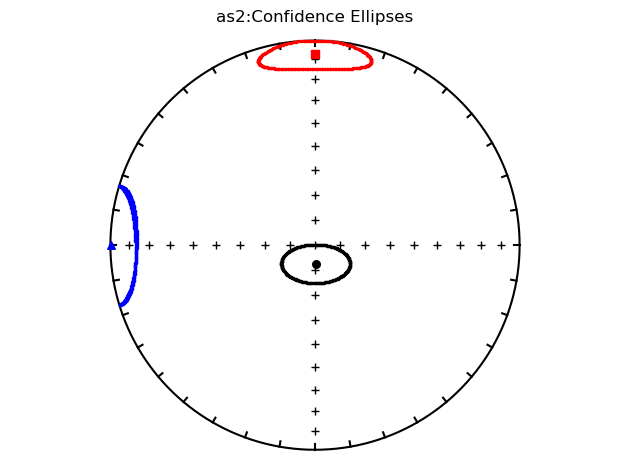

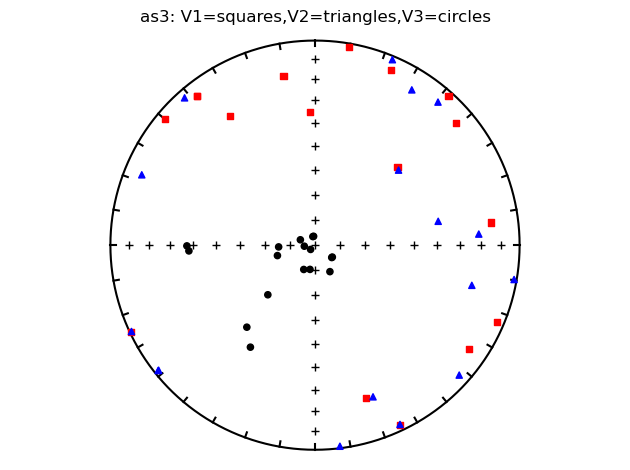

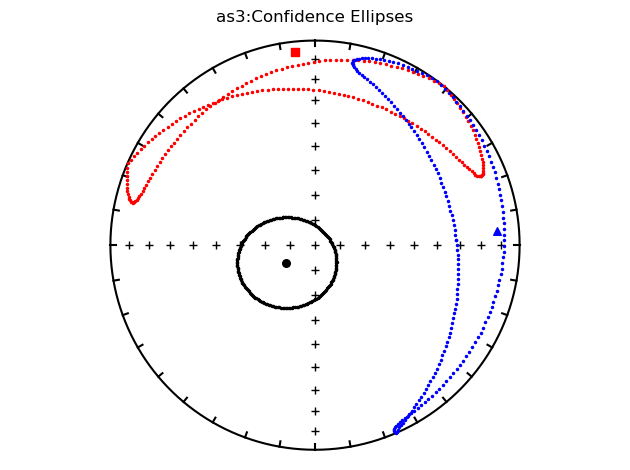

In [4]:
ipmag.aniso_magic_nb(contribution=contribution, 
                     ihext=True,
                     isite=True,
                     save_plots=False)

### Plot by site with bootstrap uncertainty

Rather that the Hext ellipses, we can plot with bootstrap resamples shown by setting `ivec=True`. This parameter choice with also lead to the generation of a plot of the bootstrap magnitudes of the mean eigenvalues. This approach enables the relative magnitudes to be compared. For example, is the fabric oblate where $ V_1 \approx V_2 \gg V_3$?


(True, [])

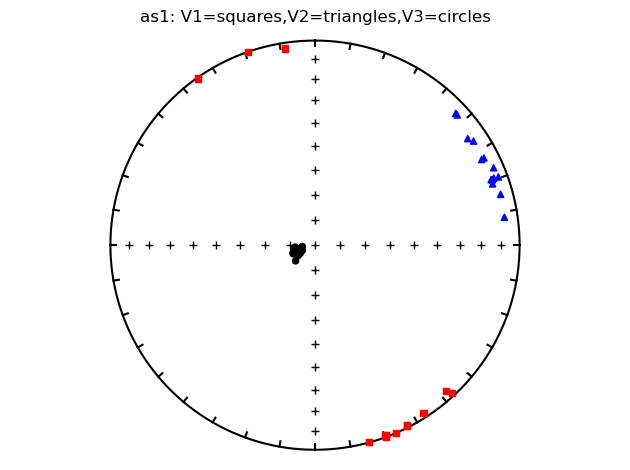

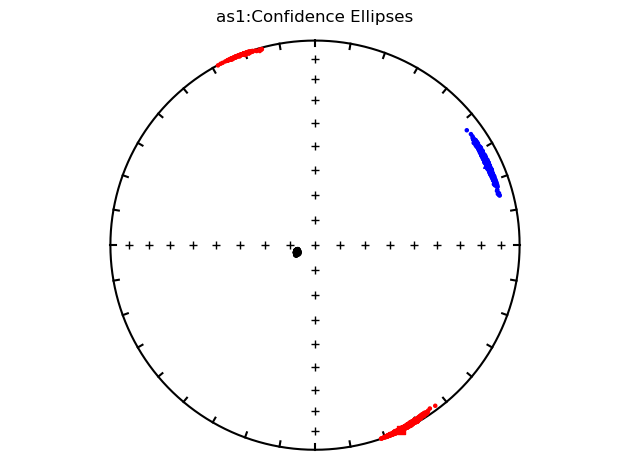

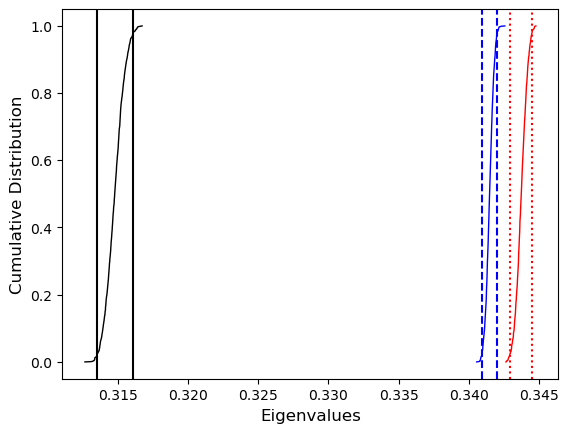

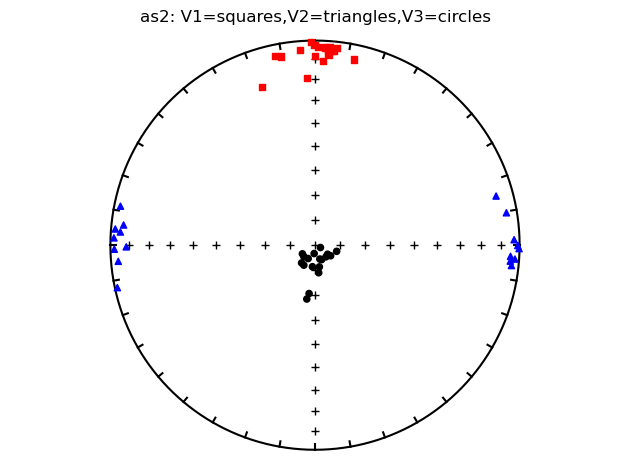

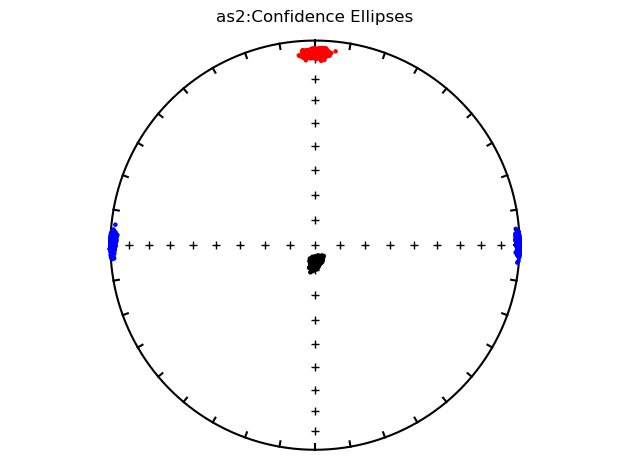

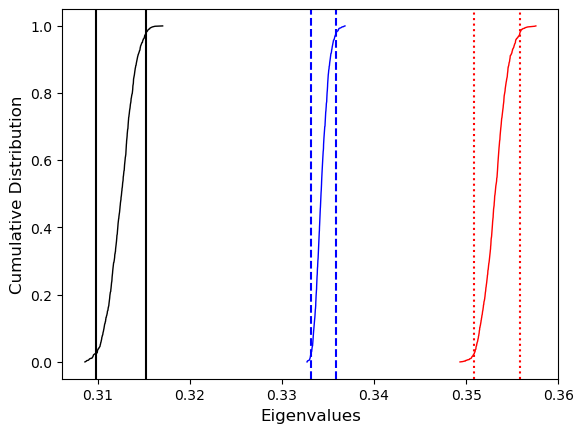

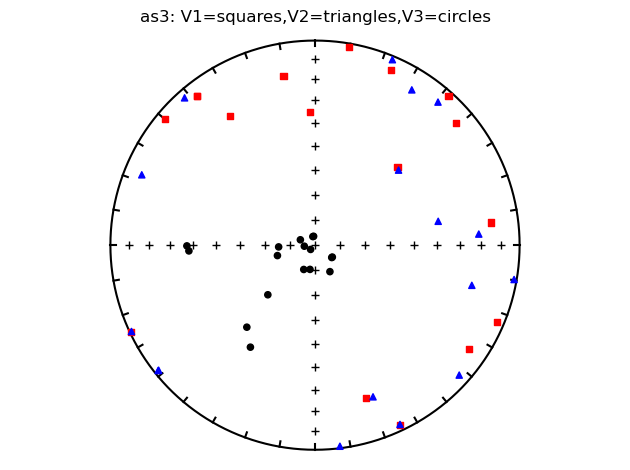

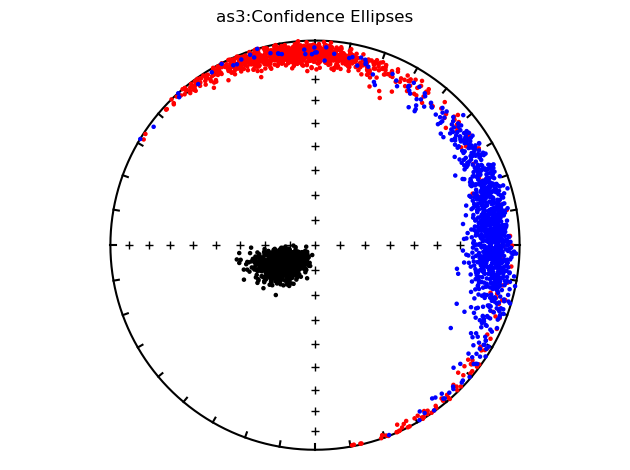

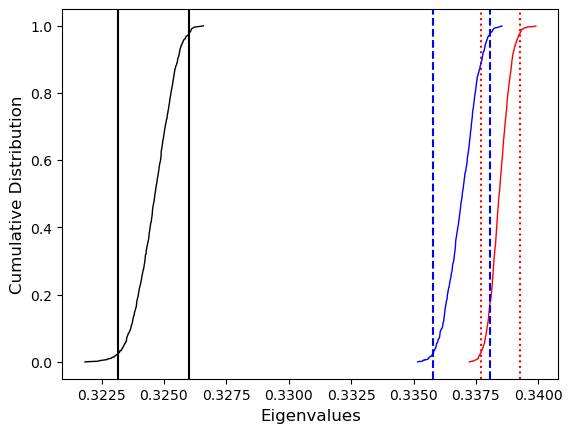

In [6]:
ipmag.aniso_magic_nb(contribution=contribution, 
                     ihext=False,
                     iboot=True,
                     isite=True,
                     ivec=True,
                     save_plots=False)

and can see the actual bootstrap resampled means rather than the associated ellipses:

(True, [])

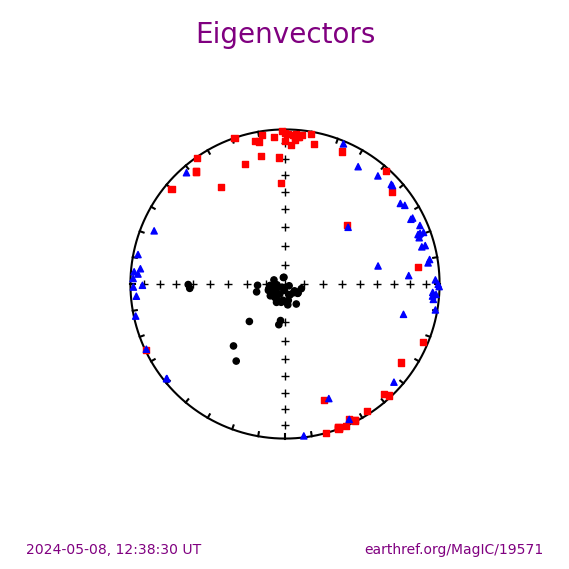

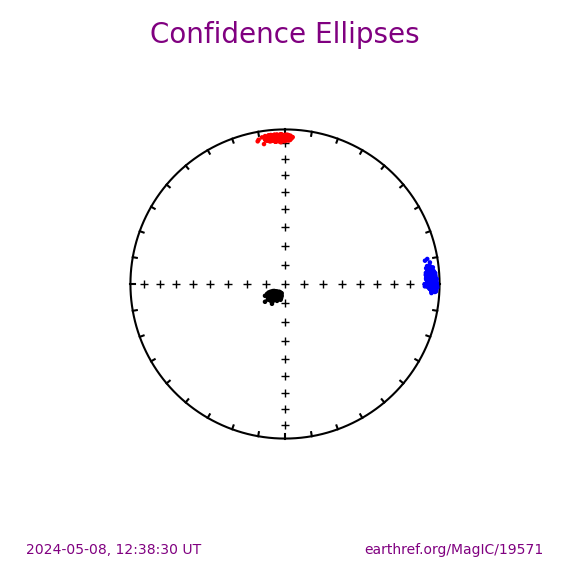

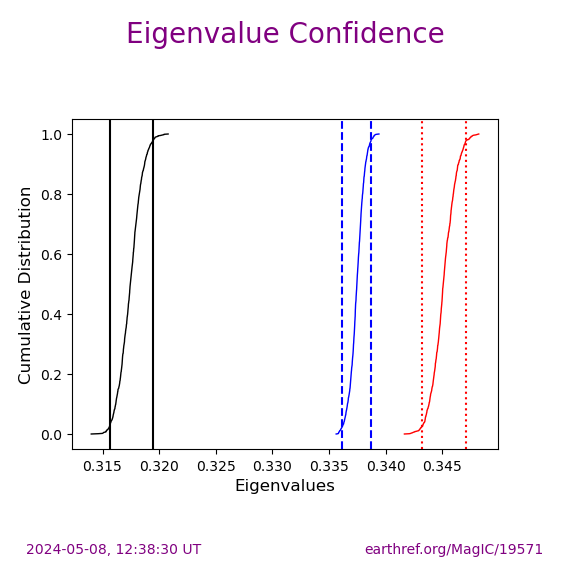

In [6]:
ipmag.aniso_magic_nb(contribution=contribution, 
                     ihext=False,
                     iboot=True,
                     ivec=True,
                     save_plots=False)

desired coordinate system not available, using available:  g


(True, [])

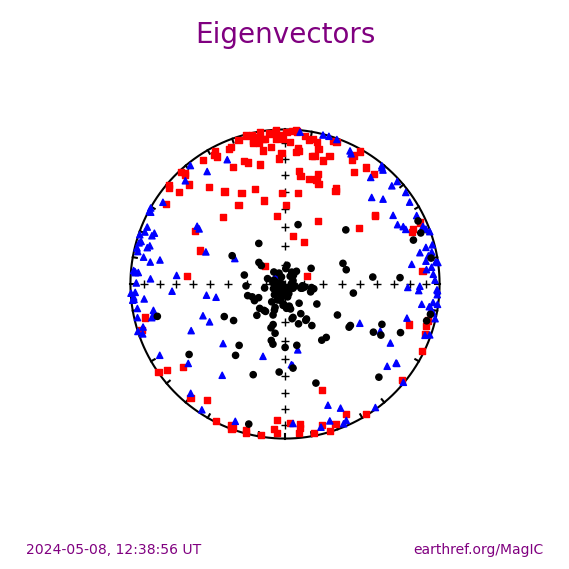

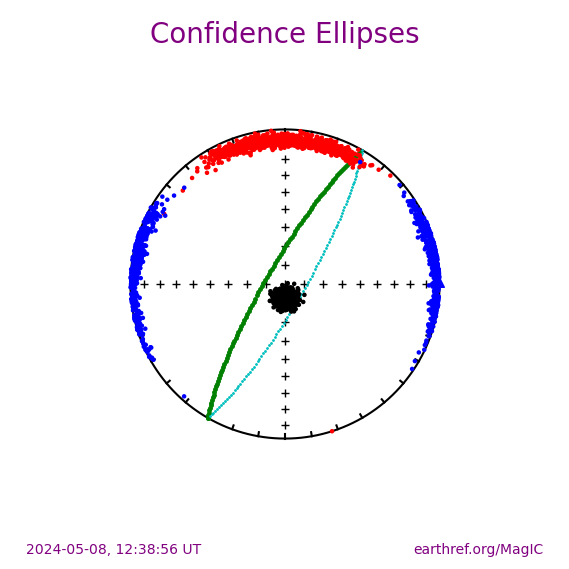

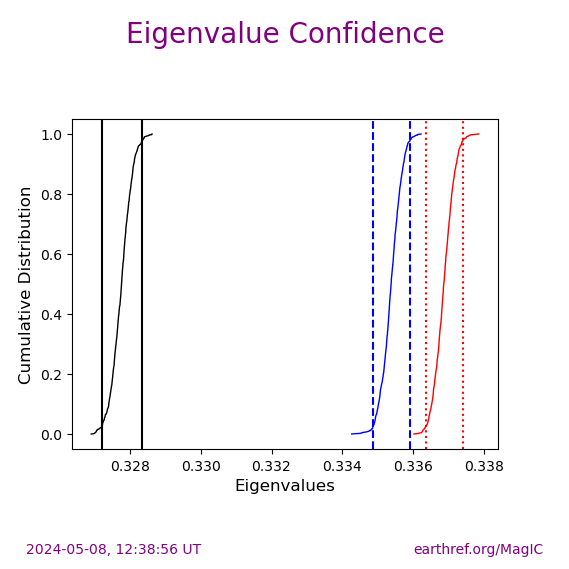

In [9]:
specimen_file = 'specimens.txt'
dir_path = 'example_data/anisotropy_sed'

ipmag.aniso_magic(infile=specimen_file,dir_path=dir_path,
       iboot=1,ihext=0,ivec=1,PDir=[120,10],ipar=1, save_plots=False) # compare dike directions with plane of dike with pole of 120,10

In [ ]:
ipmag.aniso_magic??

Signature:
ipmag.aniso_magic(
    infile='specimens.txt',
    samp_file='samples.txt',
    site_file='sites.txt',
    verbose=True,
    ipar=False,
    ihext=True,
    ivec=False,
    isite=False,
    iboot=False,
    vec=0,
    Dir=[],
    PDir=[],
    crd='s',
    num_bootstraps=1000,
    dir_path='.',
    fignum=1,
    save_plots=True,
    interactive=False,
    fmt='png',
    contribution=None,
    image_records=False,
)
Source:   
def aniso_magic(infile='specimens.txt', samp_file='samples.txt', site_file='sites.txt', verbose=True,
                ipar=False, ihext=True, ivec=False, isite=False, iboot=False, vec=0,
                Dir=[], PDir=[], crd="s", num_bootstraps=1000, dir_path=".", fignum=1,
                save_plots=True, interactive=False, fmt="png", contribution=None, image_records=False):
    """
    Makes plots of anisotropy eigenvectors, eigenvalues and confidence bounds
    All directions are on the lower hemisphere.

    Parameters:
        infile : specimens form

In [ ]:
ipmag.plot_aniso??

Signature:
ipmag.plot_aniso(
    fignum,
    aniso_df,
    Dir=[],
    PDir=[],
    ipar=False,
    ihext=True,
    ivec=False,
    iboot=False,
    vec=0,
    num_bootstraps=1000,
    title='',
)
Docstring: <no docstring>
Source:   
def plot_aniso(fignum, aniso_df, Dir=[], PDir=[], ipar=False, ihext=True, ivec=False,
               iboot=False, vec=0, num_bootstraps=1000, title=""):
    figs = {}
    ipar = int(ipar)
    ihext = int(ihext)
    ivec = int(ivec)
    iboot = int(iboot)
    Ss, V1, V2, V3 = [], [], [], []
    for ind, rec in aniso_df.iterrows():
        s = [float(i.strip()) for i in rec['aniso_s'].split(':')]
        if s[0] <= 1.0:
            Ss.append(s)  # protect against crap
            tau, Vdir = pmag.doseigs(s)
            V1.append([Vdir[0][0], Vdir[0][1]])
            V2.append([Vdir[1][0], Vdir[1][1]])
            V3.append([Vdir[2][0], Vdir[2][1]])
    Ss = np.array(Ss)
    if Ss.shape[0] > 1:
        # plot the data
        plot_net(fignum)
        figs['da

In [ ]:
ipmag.aniso_magic_nb??

Signature:
ipmag.aniso_magic_nb(
    infile='specimens.txt',
    samp_file='samples.txt',
    site_file='sites.txt',
    verbose=True,
    ipar=False,
    ihext=True,
    ivec=False,
    isite=False,
    iboot=False,
    vec=0,
    Dir=[],
    PDir=[],
    crd='s',
    num_bootstraps=1000,
    dir_path='.',
    fignum=1,
    save_plots=True,
    interactive=False,
    fmt='png',
    contribution=None,
)
Source:   
def aniso_magic_nb(infile='specimens.txt', samp_file='samples.txt', site_file='sites.txt', verbose=True,
                   ipar=False, ihext=True, ivec=False, isite=False, iboot=False, vec=0,
                   Dir=[], PDir=[], crd="s", num_bootstraps=1000, dir_path=".", fignum=1,
                   save_plots=True, interactive=False, fmt="png", contribution=None):
    """
    Wrapper for aniso_magic
    """
    return aniso_magic(infile, samp_file, site_file, verbose, ipar, ihext, ivec,
                       isite, iboot, vec, Dir, PDir, crd, num_bootstraps,
              